In [3]:
## We separate imports from the rest of the code
# -*- coding: utf-8 -*-
import numpy as np
import math
import matplotlib.pyplot as plt
import torch 

In [4]:
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

len(x), len(y)

(2000, 2000)

In [5]:
## This is just an example copied from PyTorch documentation
# Create random input and output data

x = np.linspace(-math.pi, math.pi, 2000)
f = np.sin
y = f(x)

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

99 433.19367123168047
199 307.87101407199185
299 219.61870589722992
399 157.44612335824456
499 113.63427399137433
599 82.75285862025905
699 60.980314802780875
799 45.626323859154105
899 34.79634510330615
999 27.1558316466638
1099 21.76444103831278
1199 17.959417502586632
1299 15.27353225684321
1399 13.377321354090615
1499 12.038413528630926
1599 11.09288292430793
1699 10.425065701980495
1799 9.953336007537661
1899 9.620079177117834
1999 9.384621956744475
Result: y = -0.02498271441244717 + 0.8536072808605899 x + 0.004309933950309358 x^2 + -0.09288466710307175 x^3


In [6]:
# Generates an array of 2 dimensional arrays
np.random.uniform(low=0, high=100000, size=(1000, 2)).astype(int)[0:3]

array([[ 6178, 32404],
       [73037, 50180],
       [70842, 94896]])

In [29]:
TOTAL_DATA_POINTS = 100

# customer = [loan_amount, salary] if salary > loan_amount then the user defaults
customer_profiles = np.random.uniform(low=0, high=100000, size=(TOTAL_DATA_POINTS, 2)).astype(int)
# 0 = user will pay back, 1 = user will default
def real_f(loan_amount, salary):
   return 0 if salary > loan_amount else 1

# Calculate if the user will default or not
customer_defaults = [real_f(loan_amount, salary) for loan_amount, salary in customer_profiles]

x = torch.tensor(customer_profiles).type(torch.FloatTensor)
y = torch.tensor(customer_defaults).type(torch.FloatTensor)

def normalize(x):
    return x / x.max()

x = normalize(x)

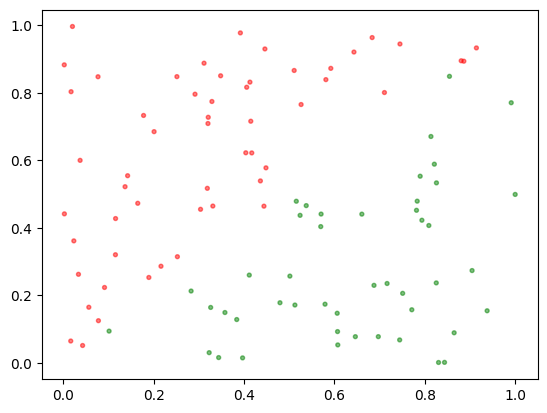

In [30]:
# Actually plot the dots in the graph

# Salary
x_axis = [x[1] for x in x]
# Loan Amount
y_axis = [x[0] for x in x]

# The color of the dot  (red = defaults, green = pays back)
colors = ['red' if y == 1 else 'green' for y in customer_defaults]

# for i in range(10):
#     print("Salary: ", x_axis[i], " Loan: ",y_axis[i], " Defaulted: ", colors[i])

plt.scatter(x_axis,y_axis,color=colors, alpha=0.5, s=8)
plt.show()

In [7]:
np.random.uniform(low=0, high=0.01, size=(2,))


array([0.00325829, 0.00696966])

In [8]:
# test = np.array([-3,-2,-1,0,1,2,3])
# (test >= 0) * 1

np.random.uniform(low=0, high=0.01, size=(2,)).T

array([0.00612594, 0.00234402])

In [23]:
learning_rate=1e-3 # 0.0001

# input 1
a = torch.tensor([0.1, 0.1], requires_grad=True, dtype = torch.float)
b = torch.tensor(0.1, requires_grad=True, dtype = torch.float)

for run in range(100000):
    y_pred = torch.sigmoid((x @ a.T) + b)
    loss = torch.abs(y_pred - y).sum()

    if run % 100 == 99:
        print(run, loss.item())

    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None


99 1.5367443561553955
199 1.519324541091919
299 1.5017900466918945
399 1.4842073917388916
499 1.466644525527954
599 1.4491684436798096
699 1.43184494972229
799 1.414736032485962
899 1.3979002237319946
999 1.3813903331756592
1099 1.3652533292770386
1199 1.34952974319458
1299 1.3342536687850952
1399 1.319451928138733
1499 1.305145263671875
1599 1.291347861289978
1699 1.2780684232711792
1799 1.2653101682662964
1899 1.2530717849731445
1999 1.2413480281829834
2099 1.2301299571990967
2199 1.2194063663482666
2299 1.2091633081436157
2399 1.199385166168213
2499 1.1900554895401
2599 1.1811562776565552
2699 1.1726696491241455
2799 1.1645768880844116
2899 1.1568593978881836
2999 1.1494990587234497
3099 1.1424777507781982
3199 1.1357780694961548
3299 1.1293829679489136
3399 1.1232759952545166
3499 1.1174414157867432
3599 1.1118642091751099
3699 1.106529951095581
3799 1.1014254093170166
3899 1.0965371131896973
3999 1.0918530225753784
4099 1.0873615741729736
4199 1.0830516815185547
4299 1.07891333103

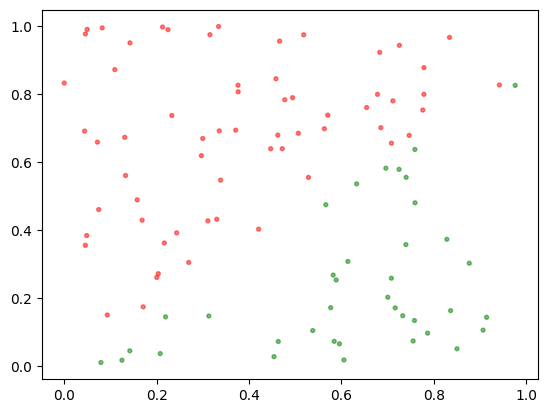

In [31]:
def useLearntFunctionToPredict(loan_amount, salary):
    # a && b -> weights we learned
    input = torch.tensor([loan_amount, salary], dtype = torch.float)
    return torch.sigmoid((input @ a.T) + b)

new_customer_profiles = np.random.uniform(low=0, high=100000, size=(TOTAL_DATA_POINTS, 2)).astype(int)
new_customer_inputs = normalize(torch.tensor(new_customer_profiles).type(torch.FloatTensor))
new_customer_predictions = [useLearntFunctionToPredict(loan_amount, salary) for loan_amount, salary in new_customer_profiles]

x_axis = [x[1] for x in new_customer_inputs]
# Loan Amount
y_axis = [x[0] for x in new_customer_inputs]

# The color of the dot  (red = defaults, green = pays back)
colors = ['red' if y == 1 else 'green' for y in new_customer_predictions]

# for i in range(10):
#     print("Salary: ", x_axis[i], " Loan: ",y_axis[i], " Defaulted: ", colors[i])

plt.scatter(x_axis,y_axis,color=colors, alpha=0.5, s=8)
plt.show()
